In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
path = '/home/st-aleksandr-razin/workspace/SRC_QC4QA/QA_pipeline/artifacts/tests/'

In [3]:
db_domain = 'databases_domain/test-LoRA_llama_filt_no_code-7b-max_prompt_length_768-databases_domain.csv'
ds_ml_domain = 'Data_Science_and_Machine_Learning_class/test-256-0.8-llama-7b-hf-Lora-Data_Science_and_Machine_Learning_class-bs_16-lr_5e-05-m_l_1280-m_p_l_768-w_decay_0.2.csv'
sys_dev = 'System_Administration_and_DevOps_class/test-256-0.8-llama-7b-hf-Lora-System_Administration_and_DevOps-bs_16-lr_0.0001-m_l_1280-m_p_l_768-w_decay_0.4.csv'
web = 'Web_Development_class/test-256-0.9.csv'
net = 'Networking_and_APIs_class/test-256-0.8-llama-7b-hf-Lora-Networking_and_APIs-bs_16-lr_0.0001-m_l_1280-m_p_l_768-w_decay_0.4.csv'
other = 'Other_class/test-256-0.8-llama-7b-hf-Lora-Other-bs_16-lr_3e-05-m_l_768-m_p_l_512-w_decay_0.2.csv'
gui = 'GUI_Desktop_Applications_class/test-256-0.8-llama-7b-hf-Lora-GUI_Desktop_Applications-bs_16-lr_3e-05-m_l_768-m_p_l_512-w_decay_0.2.csv'


web_base = 'Web_Development_class/test-256-0.9base.csv'

In [4]:
np.unique(pd.read_csv(path+web)['Generated Answer'] == pd.read_csv(path+web_base)['Generated Answer'])

array([False])

In [5]:
dfs[3].head(2)

NameError: name 'dfs' is not defined

In [46]:
dfs[-1].head(2)

Question  \
0  I am making a web application using Python, Re...   
1  I have issue with scraping page and getting js...   

                                              Answer  \
0  In the table where you store Users, you can cr...   
1  you need to use re.findall(), that will return...   

                                         Title  Score  Users Score  Q_Id  \
0  Force Reset Password after first time login    1.2            1     0   
1        Getting json from html with same name    0.0            0     1   

                                    Generated Answer   ROUGE_1   ROUGE_2  \
0  There are a few ways to do this. The simplest ...  0.353398  0.042885   
1  If you inspect your page, you'll see that your...  0.185567  0.041667   

    ROUGE_L      BLEU  
0  0.178641  0.043938  
1  0.144330  0.029994

In [8]:
for (_, row),(_, row_base) in zip(dfs[3].iterrows(), dfs[-1].iterrows()):
    print('Question')
    print('-'*100)
    print(row['Question'])
    print(' ')
    print('Answer')
    print('-'*100)
    print(row['Answer'])
    print(' ')
    print('Generated Answer by model with adapter')
    print('-'*100)
    print(row['Generated Answer'])
    print(' ')
    print('Generated Answer by pretrain model')
    print('-'*100)
    print(row_base['Generated Answer'])
    print(' ')
    print('#'*100)

Question
----------------------------------------------------------------------------------------------------
I am making a web application using Python, ReactJS , AWS lambda.
I want to force the user to change the password after first time login . How should i do with the backend change?
After resetting the password , it should redirect to normal page .
Any help would be greatly appreciated.
 
Answer
----------------------------------------------------------------------------------------------------
In the table where you store Users, you can create a column to check whether the User is logging in the first time or not. This can be done by the following method, when the user is created, the value for the column firstLogin(of Type Date) would be set as NULL, and when the user logs in the first time, you can use a Date function to obtain the date and insert the value there.
So, here is the process in brief.

Make a HTTP request to create an account using fetch, axios, request or whateve

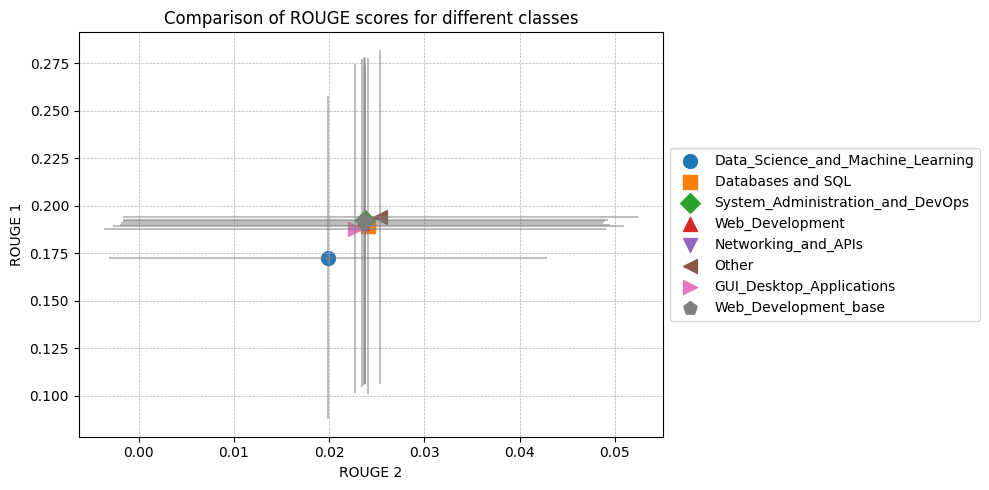

In [6]:
dfs = [pd.read_csv(path + name) for name in [
    db_domain, 
    ds_ml_domain, 
    sys_dev, 
    web, 
    net, 
    other, 
    gui,


    web_base
    ]
    ]
class_names = [
    "Data_Science_and_Machine_Learning", 
    "Databases and SQL", 
    "System_Administration_and_DevOps", 
    'Web_Development', 
    'Networking_and_APIs', 
    'Other',
    'GUI_Desktop_Applications',

    'Web_Development_base'
    ]

symbols = ["o", "s", "D", "^", "v", "<", ">", "p", "*", "H"]
plt.figure(figsize=(10, 5))

for idx, df in enumerate(dfs):
    mean_rouge1 = df['ROUGE_1'].mean()
    mean_rouge2 = df['ROUGE_2'].mean()

    std_rouge1 = df['ROUGE_1'].std()
    std_rouge2 = df['ROUGE_2'].std()

    # Plotting the central point
    plt.scatter(mean_rouge2, mean_rouge1, marker=symbols[idx], s=100, label=class_names[idx])
    

    # Plotting the range lines
    plt.plot([mean_rouge2 - std_rouge2, mean_rouge2 + std_rouge2], [mean_rouge1, mean_rouge1], color='gray', alpha=0.5)  # horizontal line
    plt.plot([mean_rouge2, mean_rouge2], [mean_rouge1 - std_rouge1, mean_rouge1 + std_rouge1], color='gray', alpha=0.5)  # vertical line

plt.xlabel('ROUGE 2')
plt.ylabel('ROUGE 1')
plt.title('Comparison of ROUGE scores for different classes')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()  # This ensures that everything fits well
plt.show()

In [14]:
dfs[0]

Question  \
0    I am a kivy n00b, using python, and am not sur...   
1    how can I make a login form that will remember...   
2    I need your advice on something that I'm worki...   
3    According to the documentation\nAWS_S3_MAX_MEM...   
4    I am trying execute Python script from RDS SQL...   
..                                                 ...   
387  I am using langchain tool with streamlit and a...   
388  I am using langchain tool with streamlit and a...   
389  I am relatively new to application development...   
390  import dbf\nopen file\ntable = dbf.Table(str("...   
391  I'm making a Connect 4 AI, and in order to inc...   

                                                Answer  \
0    This works basically the same way on android a...   
1    Some more information would be nice but if you...   
2    I have created a custom metric to which I have...   
3    System memory is considered limited, while dis...   
4    Unfortunately that is not possible as of now. ...   
..                                                 ...   
387               Try this:\npip install -U sqlalchemy   
388  Do pip install langchain==0.0.157\nIt will sol...   
389  You can't have your application automatically ...   
390  My python dbf library doesn't support index fi...   
391  Fast is relative, and here you are talking abo...   

                                                 Title     Score  Users Score  \
0    save user input data in kivy and store for lat...  1.200000            1   
1    How to do auto login in python with sql database?  0.000000            0   
2    Cloudwatch Alarm for Aurora Data Dump Automati...  0.000000            0   
3    What does AWS_S3_MAX_MEMORY_SIZE do in django-...  1.200000            2   
4    Does RDS SQL Server support running python scr...  0.379949            2   
..                                                 ...       ...          ...   
387        can not import CursorResult from sqlalchemy  0.066568            1   
388        can not import CursorResult from sqlalchemy  0.066568            1   
389  Automatically create database in python applic...  1.200000            1   
390  How to create .cdx file from .dbf file in pyhton?  0.197375            1   
391  Would it be faster to store data for a transpo...  0.000000            0   

     Q_Id                                   Generated Answer   ROUGE_1  \
0       0  There are a few ways to store data but it seem...  0.272727   
1       1  If you are just storing a username and passwor...  0.318328   
2       2  There are two solutions that come to mind. One...  0.123077   
3       3  From the [documentation](http://django-storage...  0.261719   
4       4  Yes, it will be supported but it does not look...  0.179487   
..    ...                                                ...       ...   
387   195  You can try this:\nadd this to your python fil...  0.093023   
388   196  Try this for python 3.6 and 2.7:\n\begin{itemi...  0.038710   
389   197  It might help you. [This](https://github.com/m...  0.086331   
390   198  There is no direct way to write a .CDX file us...  0.084444   
391   199  You're on the right track, but I suggest you d...  0.313978   

      ROUGE_2   ROUGE_L      BLEU  
0    0.045977  0.159091  0.057692  
1    0.045161  0.135048  0.055300  
2    0.010363  0.082051  0.060848  
3    0.039216  0.121094  0.037453  
4    0.052632  0.128205  0.044444  
..        ...       ...       ...  
387  0.048780  0.093023  0.099427  
388  0.013072  0.038710  0.059883  
389  0.007246  0.071942  0.028777  
390  0.008929  0.062222  0.038209  
391  0.043197  0.150538  0.030303  

[392 rows x 11 columns]

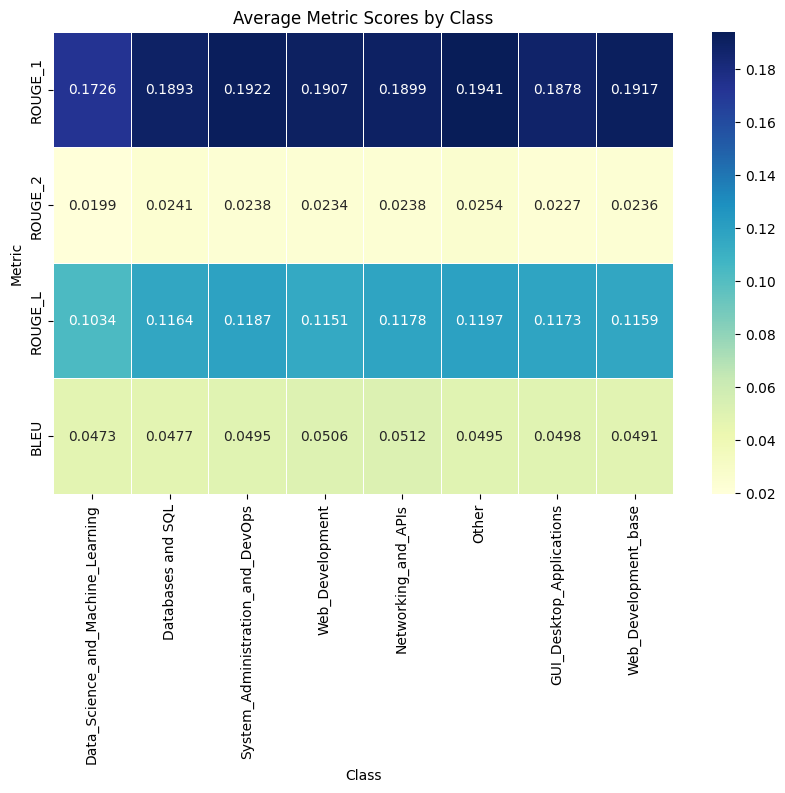

In [7]:
# Calculate mean scores for each metric and each class
data = {
    'ROUGE_1': [df["ROUGE_1"].mean() for df in dfs],
    'ROUGE_2': [df["ROUGE_2"].mean() for df in dfs],
    'ROUGE_L': [df["ROUGE_L"].mean() for df in dfs],
    'BLEU': [df["BLEU"].mean() for df in dfs]
}

df_heatmap = pd.DataFrame(data, index=class_names).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, cmap="YlGnBu", annot=True, linewidths=.5, fmt=".4f")  # annot ensures the values are displayed on the heatmap
plt.title("Average Metric Scores by Class")
plt.xlabel("Class")
plt.ylabel("Metric")
plt.show()

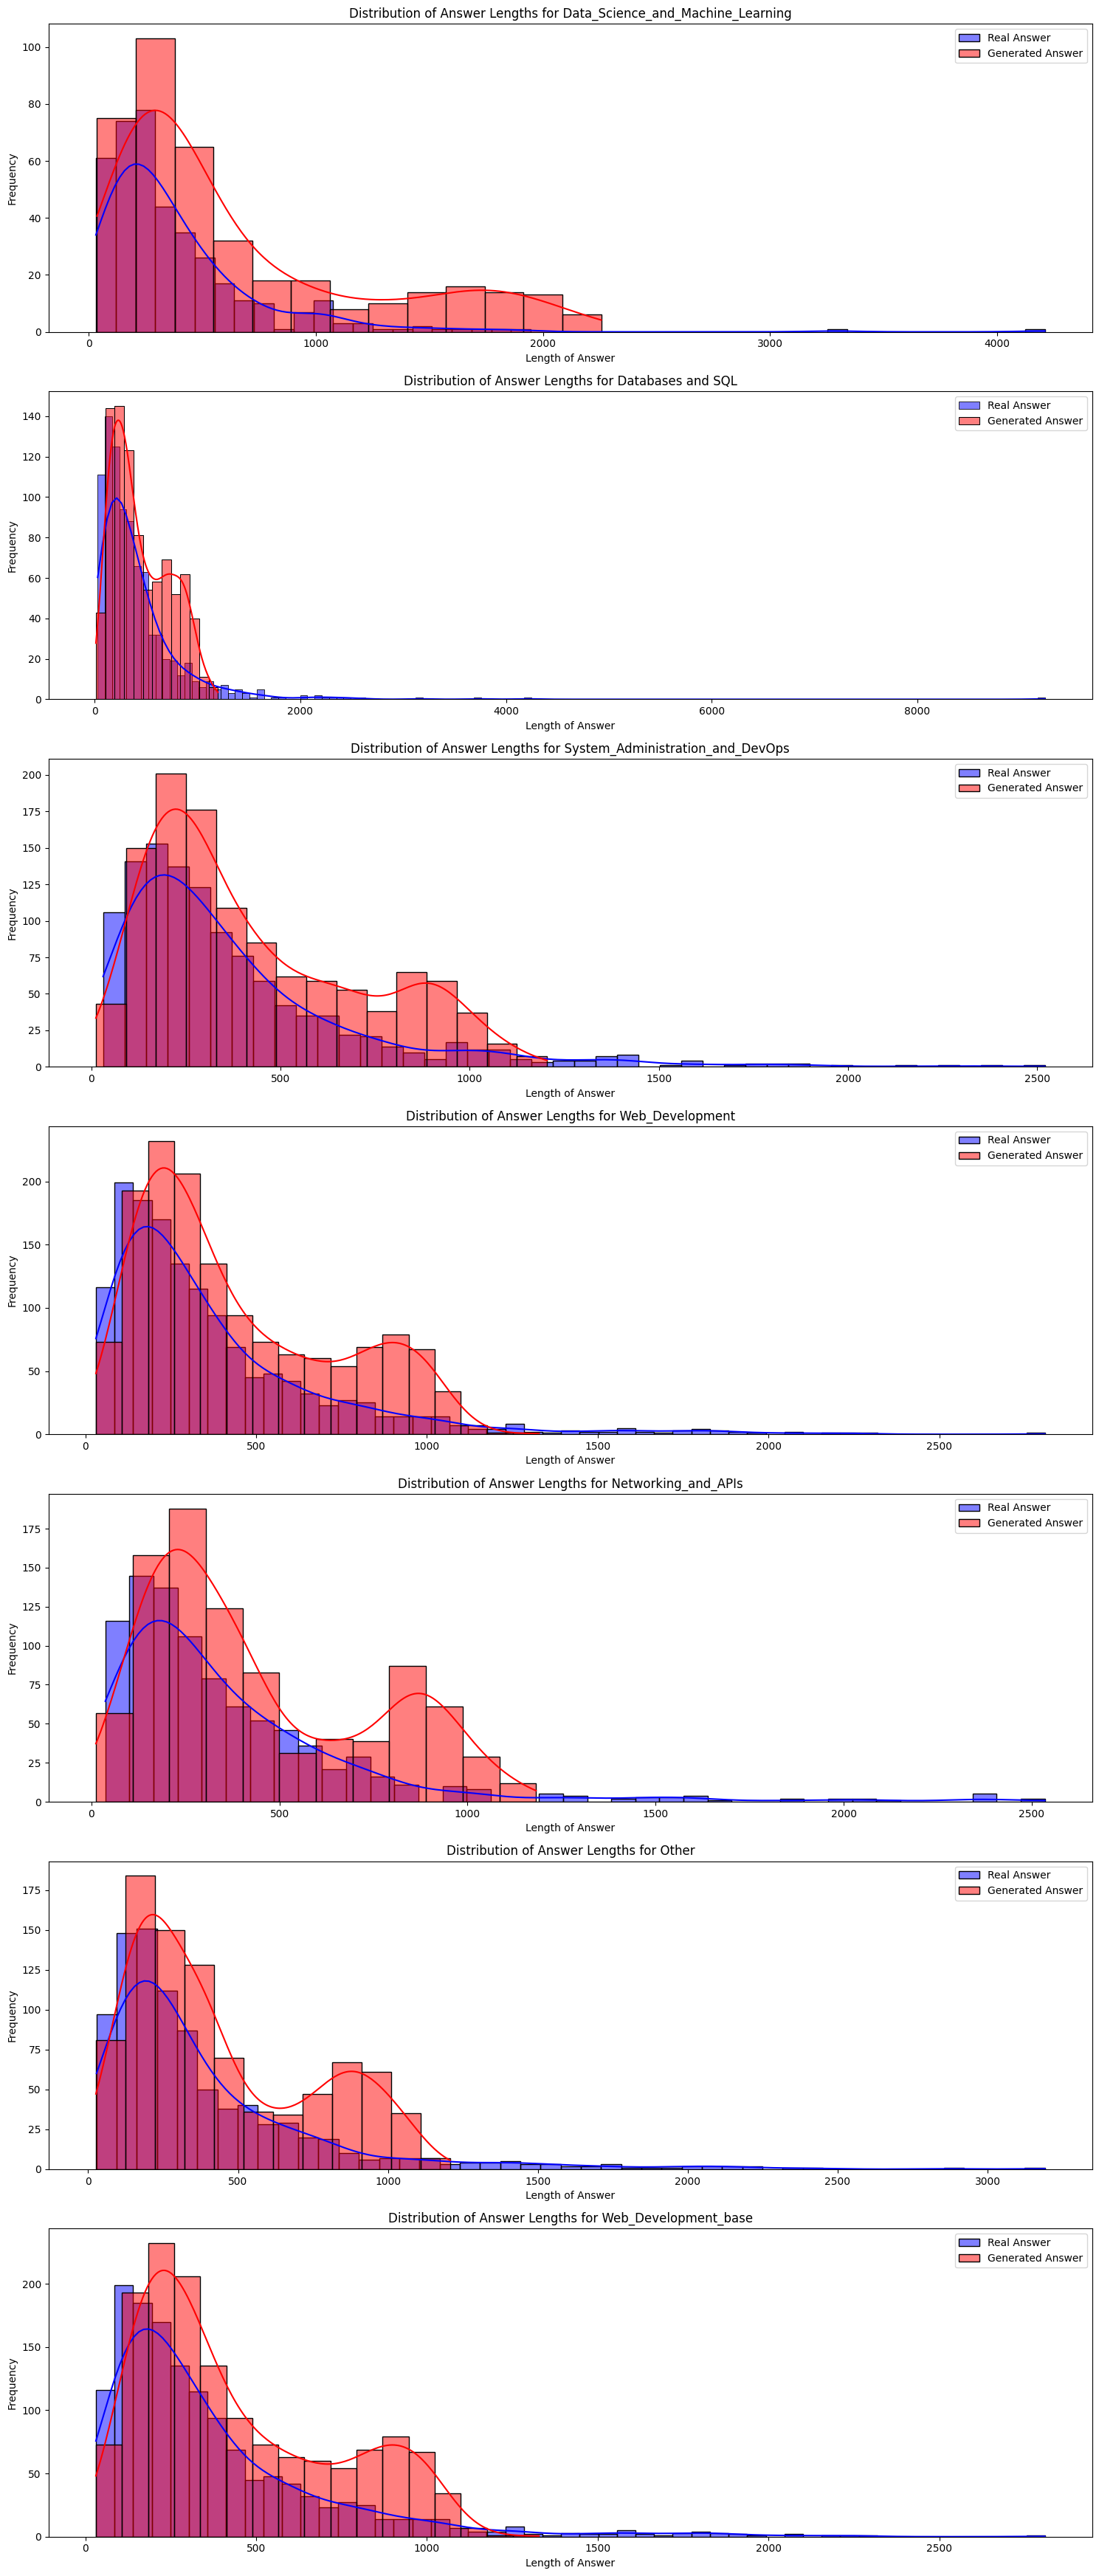

In [10]:
# Setting up the figure and axes
plt.figure(figsize=(15, len(dfs)*5))

for idx, df in enumerate(dfs):
    # Calculate lengths of answers
    real_lengths = df["Answer"].str.len()
    generated_lengths = df["Generated Answer"].str.len()

    # Setting up a subplot for each class
    plt.subplot(len(dfs), 1, idx+1)
    
    # Plotting histograms for both real and generated answers on the same axis
    sns.histplot(real_lengths, label="Real Answer", color="blue", alpha=0.5, kde=True)
    sns.histplot(generated_lengths, label="Generated Answer", color="red", alpha=0.5, kde=True)

    plt.title(f"Distribution of Answer Lengths for {class_names[idx]}")
    plt.xlabel("Length of Answer")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

classifiers

In [37]:
teacher = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/data/classified/teacher.csv')
student = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/data/classified/student.csv')

In [38]:
classes = ['Data Science and Machine Learning', 'Database and SQL', 'GUI and Desktop Applications', 
           'Networking and APIs', 'Other', 'Python Basics and Environment', 
           'System Administration and DevOps', 'Web Development']

In [39]:
# Compute metrics function
def compute_metrics(df):
    precisions = []
    recalls = []
    f1_scores = []
    
    for class_name in classes:
        true_labels = df[class_name]
        predicted_labels = df[class_name + ".1"]
        
        precisions.append(precision_score(true_labels, predicted_labels))
        recalls.append(recall_score(true_labels, predicted_labels))
        f1_scores.append(f1_score(true_labels, predicted_labels))
    
    return {
        'Precision': precisions,
        'Recall': recalls,
        'F1-Score': f1_scores,
    }

In [40]:
df_teacher = teacher
df_student = student

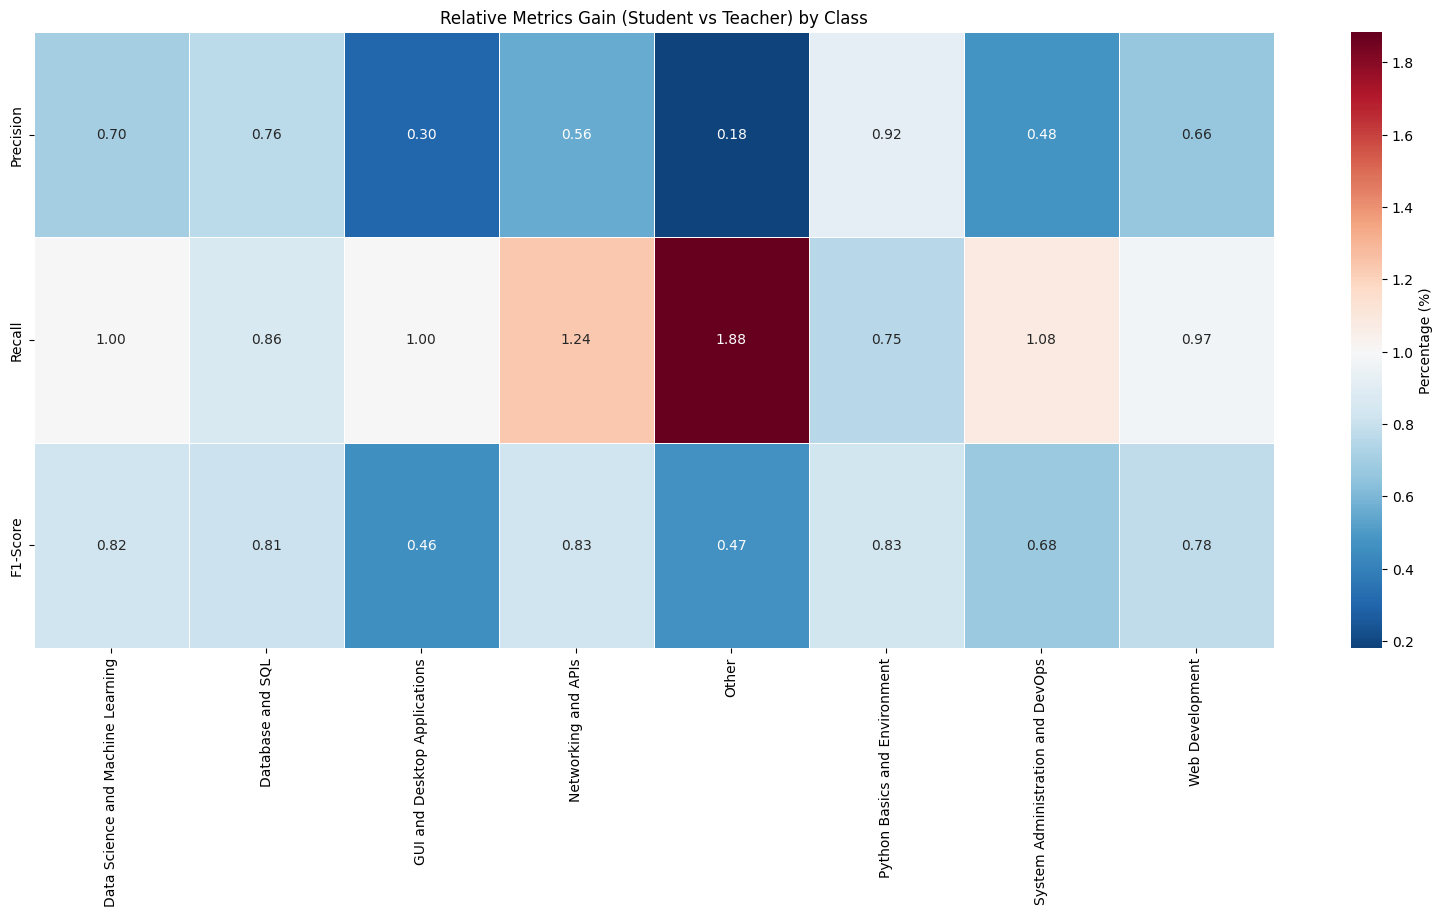

In [41]:
# Compute metrics for teacher and student
teacher_metrics = compute_metrics(df_teacher)
student_metrics = compute_metrics(df_student)

# Calculate percentage relationship
relative_percentage = {
    metric: [student_value / teacher_value for student_value, teacher_value in zip(student_metrics[metric], teacher_metrics[metric])]
    for metric in ['Precision', 'Recall', 'F1-Score']
}

# Create DataFrame for heatmap
df_heatmap = pd.DataFrame(relative_percentage, index=classes)
df_heatmap = df_heatmap.transpose()

# Plotting heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_heatmap, annot=True, cmap='RdBu_r', center=1, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Percentage (%)'})
plt.title('Relative Metrics Gain (Student vs Teacher) by Class')
plt.show()

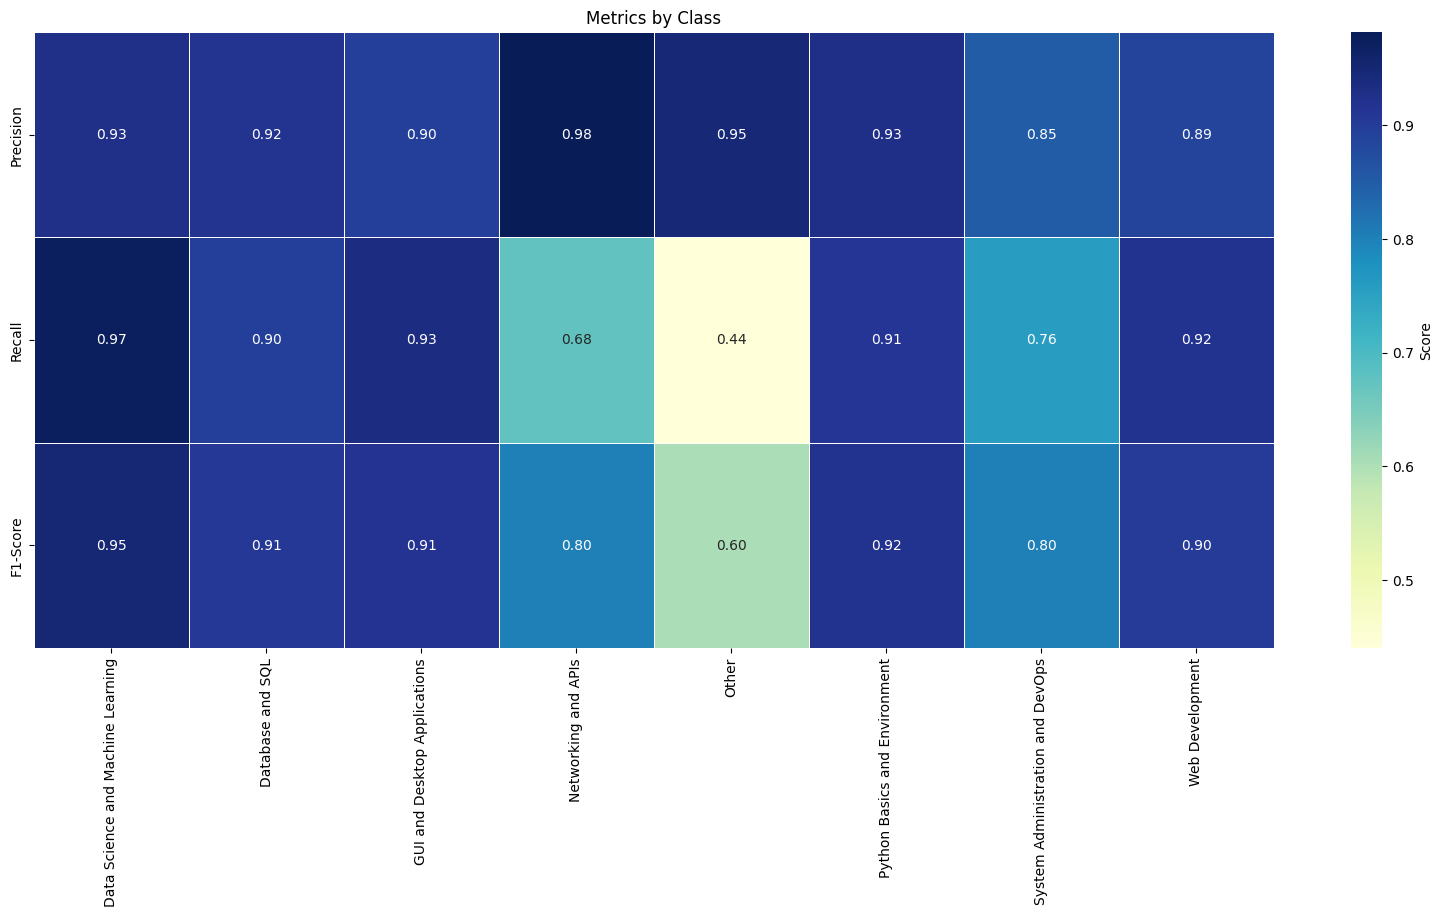

In [36]:
# Create DataFrame for heatmap
df_heatmap = pd.DataFrame(teacher_metrics, index=classes)
# Transpose the dataframe for desired heatmap layout
df_heatmap = df_heatmap.transpose()

# Plotting heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Score'})
plt.title('Metrics by Class')
plt.show()

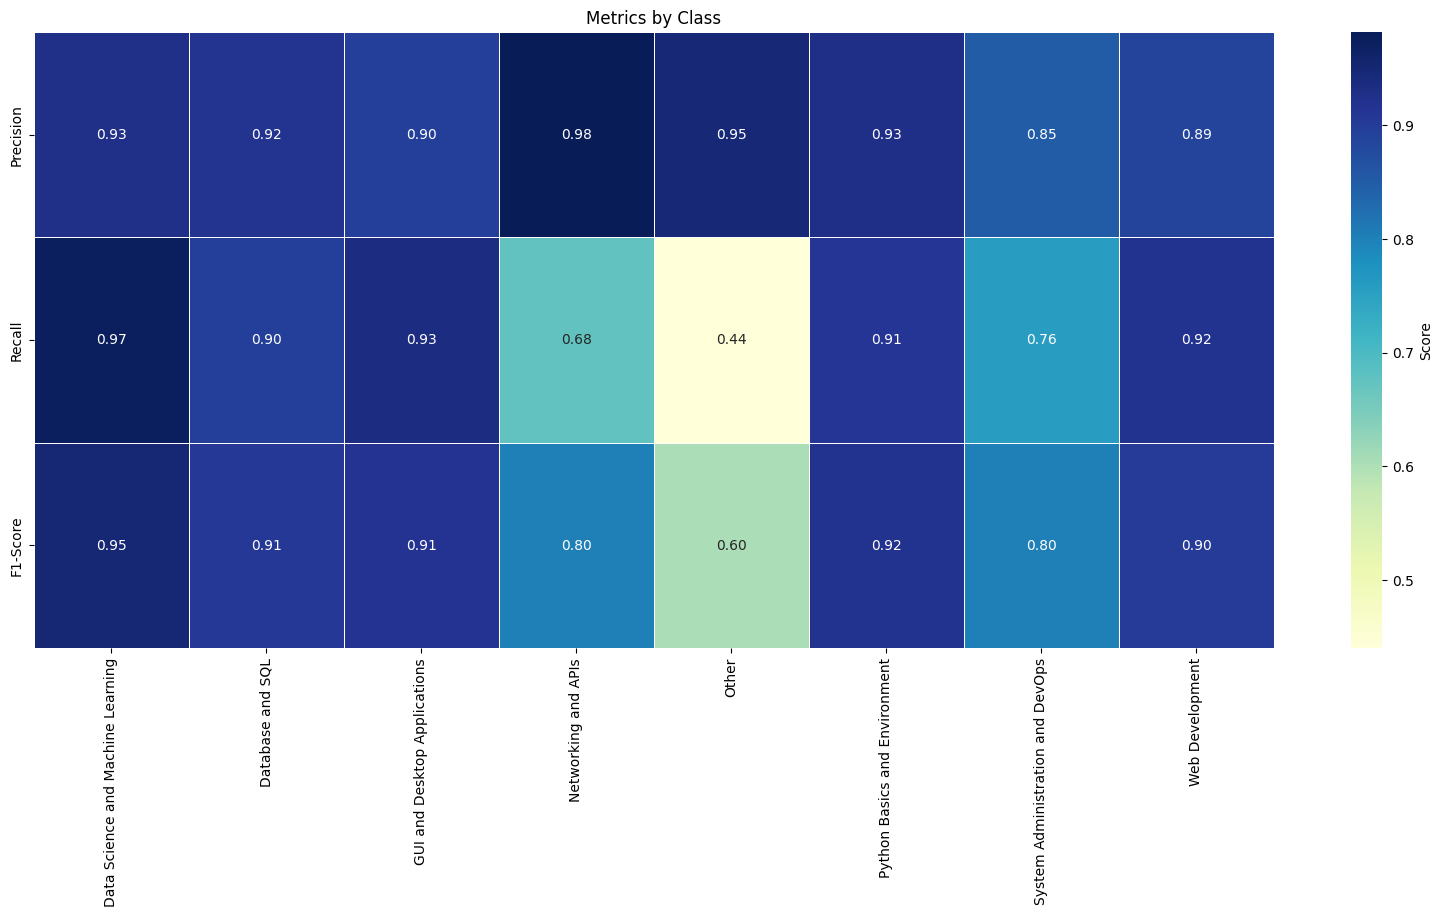

In [37]:
# Create DataFrame for heatmap
df_heatmap = pd.DataFrame(student_metrics, index=classes)
# Transpose the dataframe for desired heatmap layout
df_heatmap = df_heatmap.transpose()

# Plotting heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df_heatmap, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Score'})
plt.title('Metrics by Class')
plt.show()

times

In [74]:
def plot_distributions(teacher_times, student_times, teacher_metrics, student_metrics, quant=0.9):
    # Compute the 0.9 quantiles for teacher and student times
    teacher_quantile = np.quantile(teacher_times, quant)
    student_quantile = np.quantile(student_times, quant)
    
    # Filter data
    teacher_times_filtered = [time for time in teacher_times if time <= teacher_quantile]
    student_times_filtered = [time for time in student_times if time <= student_quantile]

    sns.set_style("whitegrid")  # This sets a background grid which helps in reading the plot

    plt.figure(figsize=(10, 6))
    
    # KDE plot for filtered teacher times
    sns.kdeplot(teacher_times_filtered, shade=True, label=f'Teacher Times ({quant} Quantile: {teacher_quantile:.2f} seconds)', color='red')
    
    # KDE plot for filtered student times
    sns.kdeplot(student_times_filtered, shade=True, label=f'Student Times ({quant} Quantile: {student_quantile:.2f} seconds)', color='green')
    
    plt.title(f'{quant} Quantile Inference Time Distributions: Teacher (F1-score: {teacher_metrics}) vs Student (F1-score: {student_metrics})')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()


def plot_batch_times(teacher_times, student_times, teacher_metrics, student_metrics, window_size=50):
    batches = np.arange(len(teacher_times[1:]))
    
    # Compute moving averages
    teacher_moving_avg = pd.Series(teacher_times[1:]).rolling(window=window_size, min_periods=1).mean().values
    student_moving_avg = pd.Series(student_times[1:]).rolling(window=window_size, min_periods=1).mean().values
    
    plt.figure(figsize=(12, 6))
    
    # Line plot for teacher times
    plt.plot(batches, teacher_times[1:], label=f'Teacher Times (Total: {np.sum(teacher_times):.2f}s)', color='red', alpha=0.5, linewidth=0.5)
    plt.plot(batches, teacher_moving_avg, color='red', linewidth=1.5)
    
    # Line plot for student times
    plt.plot(batches, student_times[1:], label=f'Student Times (Total: {np.sum(student_times):.2f}s)', color='green', alpha=0.5, linewidth=0.5)
    plt.plot(batches, student_moving_avg, color='green', linewidth=1.5)
    
    plt.title(f'Inference Time Per Batch: Teacher (F1-score: {teacher_metrics}) vs Student (F1-score: {student_metrics})')
    plt.xlabel('Batches')
    plt.ylabel('Time (seconds)')
    plt.legend()
    
    plt.tight_layout()  # Adjust layout for better display
    plt.show()

In [54]:
student_times = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/data/classified/batch_inference_times_student.csv')
teacher_times = pd.read_csv('/home/st-aleksandr-razin/workspace/SRC_QC4QA/data/classified/batch_inference_times_teacher.csv')

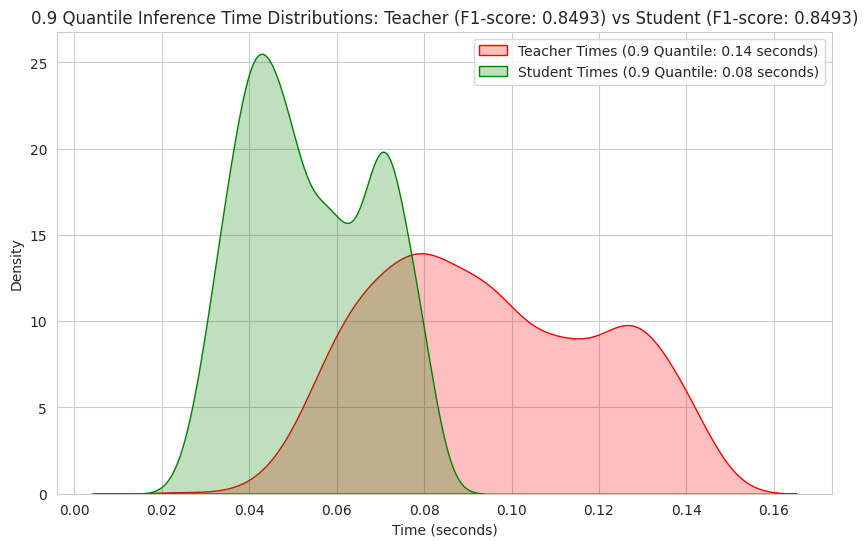

In [72]:
plot_distributions(
    teacher_times.values.squeeze(), 
    student_times.values.squeeze(), 
    round(np.mean(teacher_metrics['F1-Score']), 4), 
    round(np.mean(student_metrics['F1-Score']), 4)
    )

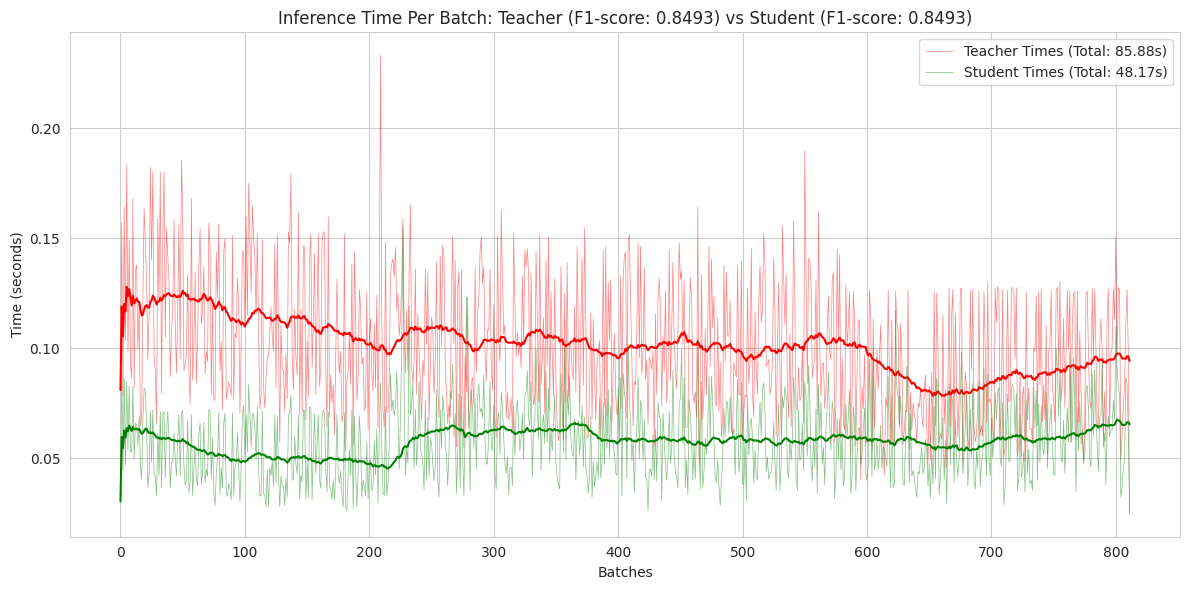

In [75]:
plot_batch_times(
    teacher_times.values.squeeze(), 
    student_times.values.squeeze(), 
    round(np.mean(teacher_metrics['F1-Score']), 4), 
    round(np.mean(student_metrics['F1-Score']), 4)
    )